# Generic Hopf model cupy 

In [1]:
import numpy as np
from vbi import LoadSample
import matplotlib.pyplot as plt
from numpy.random import uniform
from vbi.models.cupy.ghb import GHB_sde

In [2]:
seed = 2
np.random.seed(seed)

In [3]:
LABESSIZE = 14
plt.rcParams["axes.labelsize"] = LABESSIZE
plt.rcParams["xtick.labelsize"] = LABESSIZE
plt.rcParams["ytick.labelsize"] = LABESSIZE

In [4]:
weights = LoadSample(nn=84).get_weights()
nn = len(weights)

In [5]:
freq = uniform(0.02, 0.04, nn)
omega = 2 * np.pi * freq

In [6]:
eta_mu = -1.
eta_std = 1.
eta_heter_rnd = np.random.randn(nn)
eta = eta_mu+eta_std * eta_heter_rnd

In [7]:
Gs = np.linspace(1, 25, 3)
num_sim = len(Gs)

In [8]:
params = {
    "eta": eta,
    "dt": 0.01,
    "num_sim": num_sim,
    "sigma": 0.1,
    "t_cut": 10.0,
    "t_end": 60.0,
    "G": Gs,
    "decimate": 10,
    "omega": omega,
    "engine": "gpu",
    "weights": weights,
    "initial_state": uniform(0, 1, (2 * nn, num_sim)),
}

In [9]:
obj = GHB_sde(params)
data = obj.run()
t = data['t']
bold = data['bold']
print(t.shape, bold.shape)

Integrating: 100%|██████████| 6000/6000 [00:23<00:00, 258.71it/s]

(499,) (84, 499, 3)


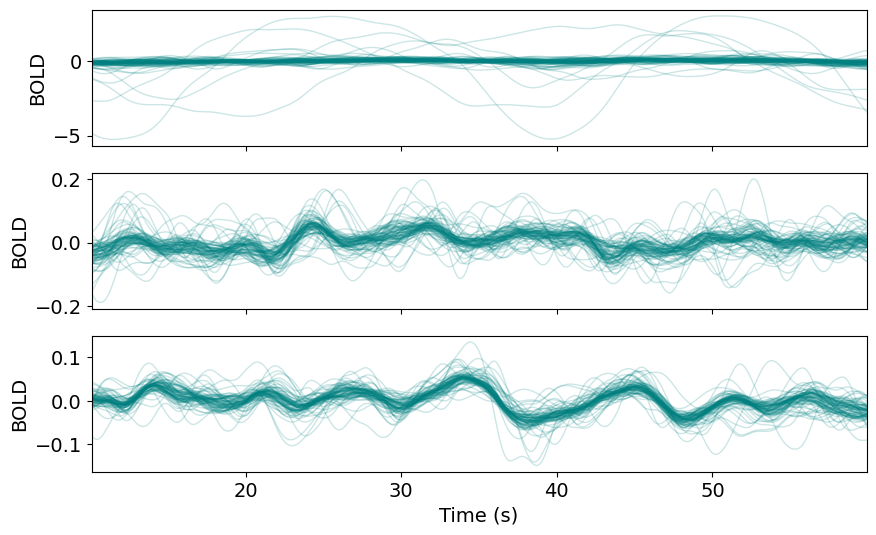

In [10]:
num_sim = 3
fig, ax = plt.subplots(num_sim, figsize=(10, 6), sharex=True)
for i in range(num_sim):
    ax[i].plot(t, bold[:, :, i].T, lw=1, alpha=0.2, color='teal')
    ax[i].set_ylabel("BOLD")
ax[-1].set_xlabel("Time (s)")
ax[0].margins(x=0)
plt.show()